#### Pro tip: Alt+Z -- toggle word wrap (попробуй потыкать, когда редачишь длиную клетку)
Если что, слева сверху нужно сделать ```Select Kernel>Python enviroments>какая-нибудь версия питона (лучше последнюю)```

In [101]:
# этот ноутбук относится к лабе такойто такойто
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyperclip import copy # копировать в буфер обмена
def latex(d: pd.DataFrame, print_output=False) -> None: # вынес в отдельную функцию для удобства
  (print if print_output else copy)(d.to_latex(index=False)) # см доки

In [2]:
# диаметры  шариков:

d = np.array([
  0.6, 0.59, 0.6, 0.59, 0.58, 0.59, 0.59, 0.6, 0.60, 0.6
]) # крутой массив

In [103]:
# Задание 2. крутильный момент стрелки
a2 = pd.DataFrame()

a2['n'] = np.arange(3, 11)
a2['t'] = ( # в с
  15.13 / 15, 18.47 / 12, 28.39 / 15, 34.75 / 15, 36.45 / 14, 29.52 / 10, 37.39 / 11, 56.00 / 15
)

 
0.379 x - 0.03295 
eror: 0.06562085215230255


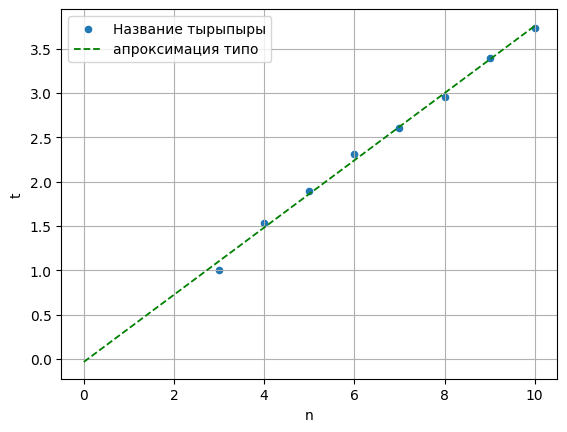

In [117]:
# график пункт 1

# график
ox = a2['n'] # удобно в самом начале определять, что у тебя ох и оу, чтобы потом с ними работать
oy = a2['t']

plt.scatter( # scatter ставит точки
  ox,
  oy,
  s=20,
  label="Название тырыпыры"
  # , marker = "^"
  # marker меняет форму точек (удобно когда несколько штук на одном 
  # графике нужно нарисовать). какие конкретно -- см доки https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1) # это 2 волшебные строчки, которые лучше не трогать (можно поменять 1, но это кажется нигде не надо и ес что см. доки)
# по итогу получается, что p1 -- уравнение прямой, которой мы линеаризируем (и можно прям точки в него подставлять), а погрешность вот так считается (это както поумному объясняется): 
print(str(p1), "\neror:", res[0][0] ** 0.5/((z1[0])**2))

plt.plot((0, ox.max()), p1(((0, ox.max()))), 'g--', linewidth=1.3, label='апроксимация типо') # plot в тупую соединяет точки. => чтобы нарисовать простую линию в него можно просто 2 точки передать
# тут 'g--' это сокращение от color='green', linestyle='--'. всегда должен идти 3, если юзаешь

plt.xlabel("n")
plt.ylabel("t")
plt.grid() # добавляем сетку
plt.legend(loc='best') # там есть разные варианты для расположения, но best ни разу не подводил
# plt.ylim(bottom=1.4, top=4.5) -- штука, чтобы ограничить график (для x аналогично). пользовался раза 2
plt.savefig("p1.png") # сохраняет; там в вектор тоже можно было, но векторы у меня в латех криво вставляются
plt.show() # показывает и сбрасывает всё, что нарисовано